In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
path ="https://raw.githubusercontent.com/JedhaBootcamp/FULL_STACK_12_WEEK_PROGRAM/master/S0.3%20--%20Machine%20Learning%20Supervis%C3%A9/Projet%20--%20CONVERSION%20RATE/conversion_data.csv?token=AMEQSCLJ5QU6PDWMGBOWLZS5HCJGU"

In [3]:
dataset = pd.read_csv(path)

In [4]:
dataset.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [5]:
len(dataset)

316200

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
country                316200 non-null object
age                    316200 non-null int64
new_user               316200 non-null int64
source                 316200 non-null object
total_pages_visited    316200 non-null int64
converted              316200 non-null int64
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [7]:
dataset.describe(include="all")

,country,age,new_user,source,total_pages_visited,converted
count,316200,316200.000000,316200.000000,316200,316200.000000,316200.000000
unique,4,NaN,NaN,3,NaN,NaN
top,US,NaN,NaN,Seo,NaN,NaN
freq,178092,NaN,NaN,155040,NaN,NaN
mean,NaN,30.569858,0.685465,NaN,4.872966,0.032258
std,NaN,8.271802,0.464331,NaN,3.341104,0.176685
min,NaN,17.000000,0.000000,NaN,1.000000,0.000000
25%,NaN,24.000000,0.000000,NaN,2.000000,0.000000
50%,NaN,30.000000,1.000000,NaN,4.000000,0.000000
75%,NaN,36.000000,1.000000,NaN,7.000000,0.000000


In [8]:
dataset.isnull().sum()/len(dataset)  

country                0.0
age                    0.0
new_user               0.0
source                 0.0
total_pages_visited    0.0
converted              0.0
dtype: float64

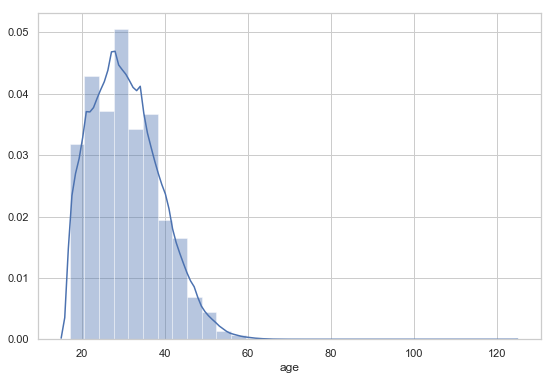

In [9]:
g = sns.set(style="whitegrid")
g, ax= plt.subplots(1, figsize=(9,6))
sns.distplot(dataset.age, bins=30, kde=True, ax=ax)

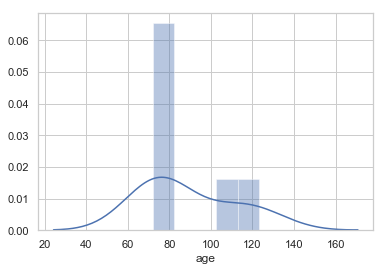

In [10]:
sns.distplot(dataset[dataset["age"] > 70].age, bins=5 )

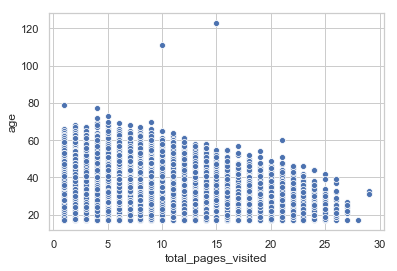

In [11]:
sns.scatterplot(x= "total_pages_visited", y= "age", data= dataset)

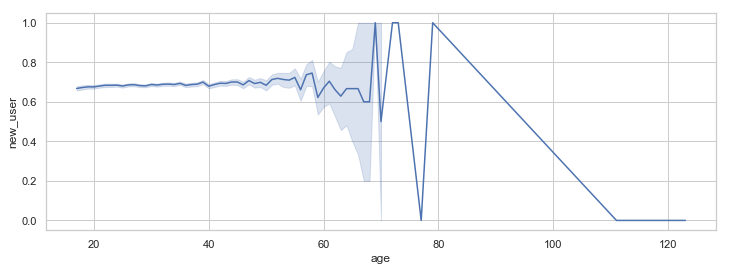

In [12]:
g = sns.set(style="whitegrid")
f, ax= plt.subplots(1, figsize=(12,4))
sns.relplot(x="age", y="new_user", data=dataset , kind="line", ax=ax)
plt.close()

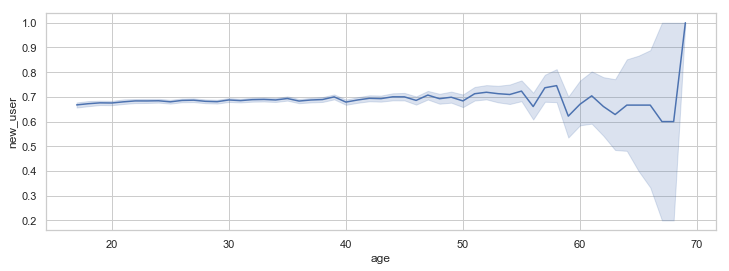

In [13]:
g = sns.set(style="whitegrid")
f, ax= plt.subplots(1, figsize=(12,4))
sns.relplot(x="age", y="new_user", data=dataset[dataset["age"] < 70], kind="line", ax=ax)
plt.close()

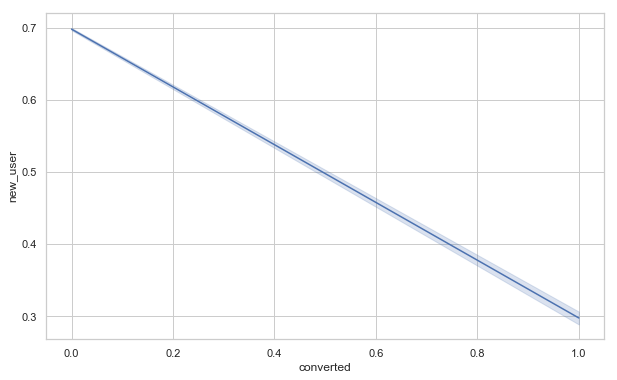

In [14]:
g = sns.set(style="whitegrid")
f, ax= plt.subplots( figsize=(10,6))
sns.relplot(x="converted", y="new_user", data=dataset, kind="line", ax=ax)
plt.close()

In [15]:
dataset = dataset[dataset["age"]<70] # remove age less than 70 ages

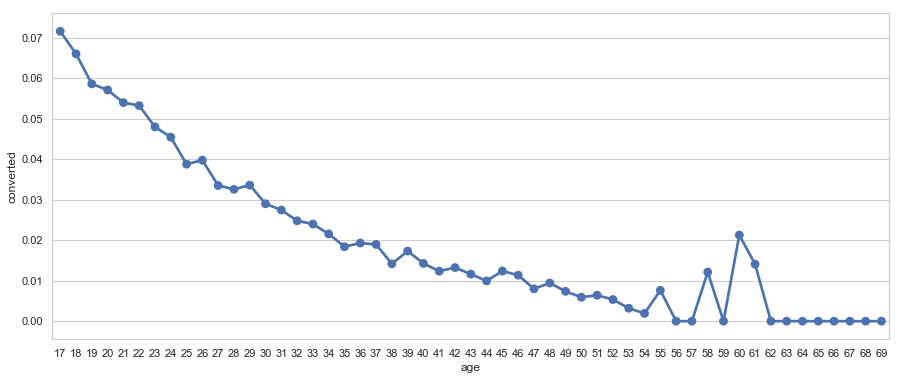

In [16]:
g = sns.set(style="whitegrid")
g, ax= plt.subplots(1, figsize=(15,6))
sns.pointplot(x="age", y="converted", data=dataset, ci=None, logistic=True)

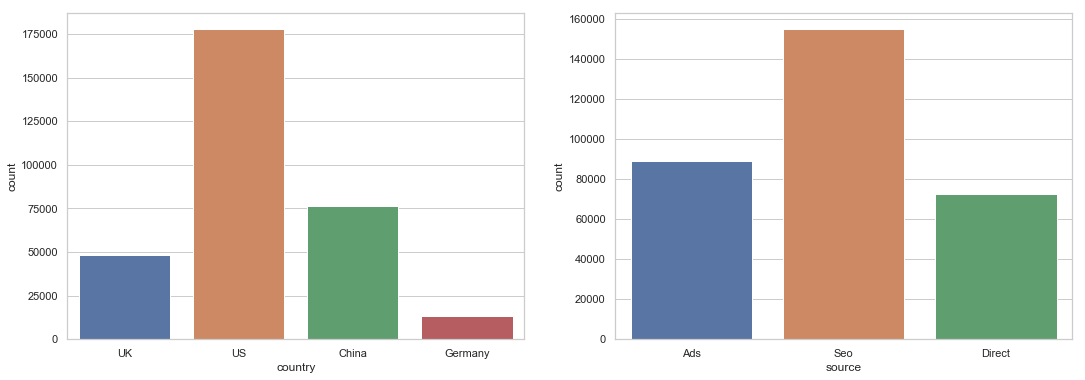

In [17]:
f, ax = plt.subplots(1,2, figsize=(18,6))
sns.countplot(dataset.country, ax = ax[0])
sns.countplot(dataset.source, ax = ax[1])

==> The number of pages visited is almost the same for all countries.

Important:
_ Despite the weak representation of the Germans compared to the US in the dataset, are they who visit more pages.

_ The Chinese visit fewer pages despite their representation (2nd place) in the dataset. This may be due to language constraints or the bans of certain sites on their territory.

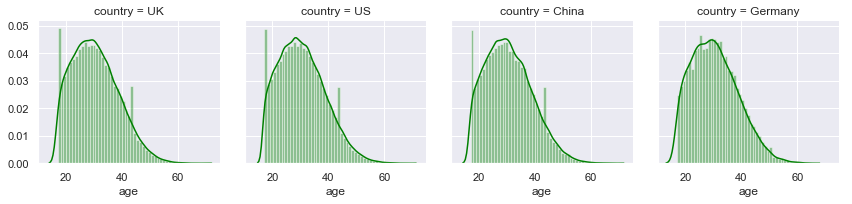

In [19]:
dist_age = sns.FacetGrid(data = dataset, col = "country")
dist_age.map(sns.distplot, "age",  color="green")

==> An almost identical distribution for the 4 countries

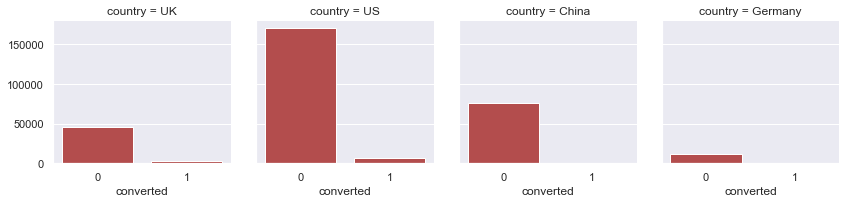

In [20]:
convert = sns.FacetGrid(data = dataset, col = "country")
convert.map(sns.countplot,"converted",  color="red", saturation=0.4)

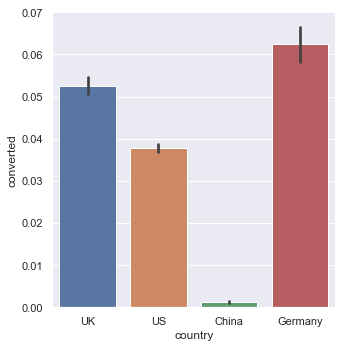

In [21]:
sns.set(style="darkgrid")
sns.catplot(x="country", y="converted", data=dataset, kind="bar")

==> Although Germany is the least represented in the dataset, it remains the pats with the highest conversion rate, intersting is China has the lowest conversion even though they has highly page visited.why?
1 reason is langues 
2 reason is culture
3 Network block of security and politique
4 habits of consumption and competition location(Taobao,JD etc)

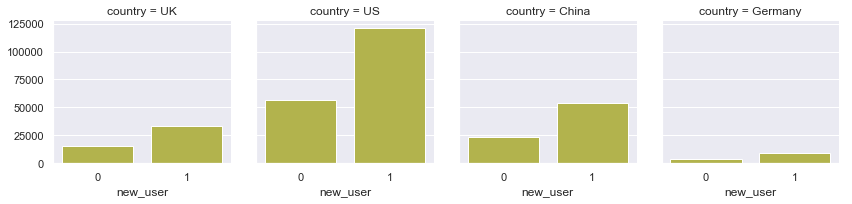

In [22]:
user = sns.FacetGrid(data = dataset, col = "country")
user.map(sns.countplot, "new_user", color="yellow", saturation=0.4)

We will now see the same analysis but on (converted = 1) only to see what happens

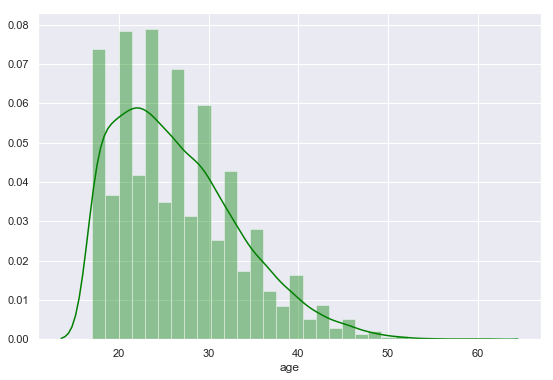

In [23]:
g, ax= plt.subplots(1, figsize=(9,6))
sns.distplot(dataset[dataset["converted"]== 1]["age"], bins=30, kde=True, color='green', ax=ax)

==> The graph confirms our idea previously said. Young people convert more than older people

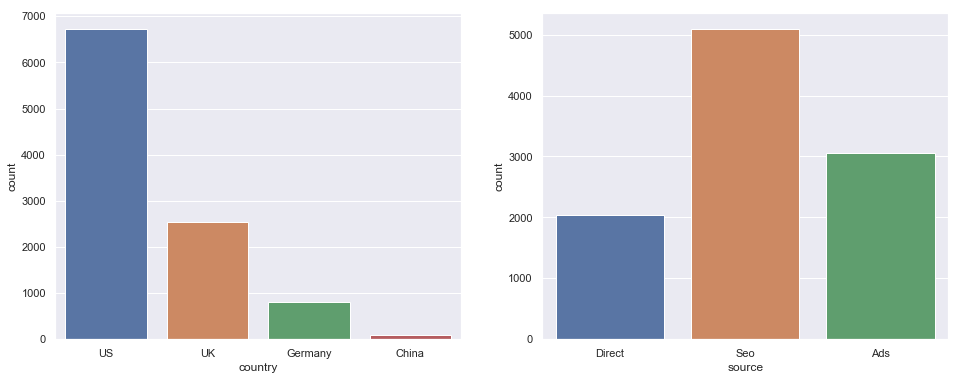

In [25]:
f, ax = plt.subplots(1,2, figsize=(16,6))
sns.countplot(x="country", data=dataset[dataset["converted"]== 1], ax=ax[0])
sns.countplot(x="source", data=dataset[dataset["converted"]== 1], ax=ax[1])

==>Seo is a good way has more influence to make converted

In [26]:
country_conversion_rate = (dataset.converted.groupby(dataset.country).sum() / dataset.converted.groupby(dataset.country).count()).reset_index()
country_conversion_rate.head(10)

,country,converted
0,China,0.001332
1,Germany,0.062428
2,UK,0.052613
3,US,0.037802


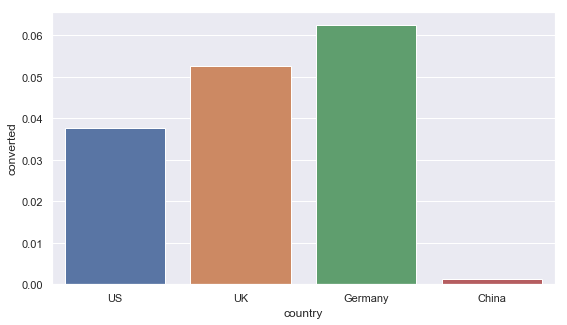

In [27]:
f, ax = plt.subplots(figsize = (9,5))
sns.barplot(country_conversion_rate.country.sort_values(ascending=False), y= country_conversion_rate.converted, ax=ax)

==> Germany and the UK have the highest conversion rates at 6% and 5%, respectively, while they are the two countries with the lowest number of visitors.

In [28]:
age_conversion_rate = (dataset.converted.groupby(dataset.age).sum() / dataset.converted.groupby(dataset.age).count()).reset_index()
age_conversion_rate.head(10)

,age,converted
0,17,0.071607
1,18,0.066029
2,19,0.058616
3,20,0.057109
4,21,0.053985
5,22,0.053243
6,23,0.047990
7,24,0.045448
8,25,0.038782
9,26,0.039767


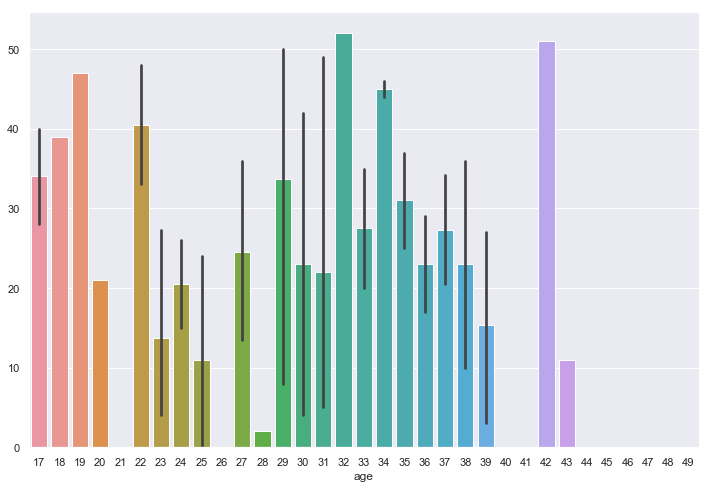

In [29]:
f, ax = plt.subplots(figsize = (12,8))
sns.barplot(x="age" , y= age_conversion_rate.index, data=dataset[dataset["age"] <50], ax=ax)

==> it is better to do age groups to better visualize the conversion rate according to age

Let's move on to modeling our prediction model
country and source are qualitative variables ==> transform into quantitative variables

In [30]:
dataset = pd.get_dummies(dataset, drop_first=True)
dataset.head()

,age,new_user,total_pages_visited,converted,country_Germany,country_UK,country_US,source_Direct,source_Seo
0,25,1,1,0,0,1,0,0,0
1,23,1,5,0,0,0,1,0,1
2,28,1,4,0,0,0,1,0,1
3,39,1,5,0,0,0,0,0,1
4,30,1,6,0,0,0,1,0,1


In [31]:
X = dataset.loc[:, dataset.columns != 'converted']
y = dataset["converted"]

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify = y, random_state=0 )

In [33]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train, X_test = sc_X.fit_transform(X_train) , sc_X.transform(X_test)

Model of Regression

In [36]:
from sklearn.linear_model import LogisticRegression
LogisReg = LogisticRegression()
LogisReg.fit(X_train, y_train)
print(LogisReg.score(X_test, y_test))
print(LogisReg.score(X_test, y_test))

0.9864745198085559
0.9864745198085559


Model of Decision Tree

In [39]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='gini', class_weight=None, random_state=42)
clf = clf.fit(X_train, y_train)

In [40]:
score = clf.score(X_test, y_test)
score

0.9840814691433512

Model of Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(  n_estimators=50,      
                               max_depth=4,          
                               random_state=42,      
                               min_samples_leaf= 10)
RFC.fit(X_train, y_train)

print(RFC.score(X_test, y_test))


0.984851040502646


In [43]:
from sklearn.model_selection import GridSearchCV

rtc = RandomForestClassifier(random_state = 42)
params = {"n_estimators" : np.arange(10,100,20),
          'max_depth' : np.arange(3,6),
          'min_samples_leaf' : np.arange(5,20,5)
         }
grid =  GridSearchCV(estimator=rtc, param_grid= params, cv = 10, n_jobs =-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'m

In [44]:
grid.best_params_

{'max_depth': 5, 'min_samples_leaf': 15, 'n_estimators': 90}

In [45]:
grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=90,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [46]:
grid.best_estimator_.score(X_test, y_test)

0.984977545383626

In [47]:
grid.best_estimator_.score(X_train, y_train)

0.9852801648187807

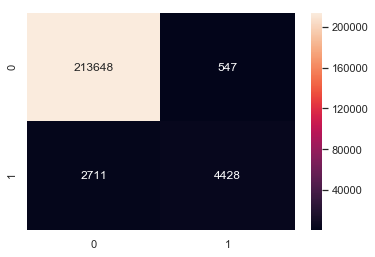

In [50]:
cm = confusion_matrix(y_train, grid.best_estimator_.predict(X_train))
sns.heatmap(cm, annot=True, fmt="d")